In [20]:
import json
import pandas as pd
import numpy as np

In [21]:
#papers_df is pandas dataframe object
#papers_df = pd.read_json('Papers_Metadata_6K.json')

papers_df = pd.read_json('temp4.json',lines=True)
papers_df.rename(columns = {"paper_text" : "summary"},inplace=True)

papers_df.head()

,day,id,month,summary,title,year,Topic1,Topic2,Topic3,Author1,Author2,textLink,pdfLink
0,1,1802.00209v1,2,We propose an architecture for VQA which utili...,Dual Recurrent Attention Units for Visual Ques...,2018,cs.AI,cs.CL,cs.CV,Ahmed Osman,Wojciech Samek,http://arxiv.org/abs/1802.00209v1,http://arxiv.org/pdf/1802.00209v1
1,12,1603.03827v1,3,Recent approaches based on artificial neural n...,Sequential Short-Text Classification with Recu...,2016,cs.CL,cs.AI,cs.LG,Ji Young Lee,Franck Dernoncourt,http://arxiv.org/abs/1603.03827v1,http://arxiv.org/pdf/1603.03827v1
2,2,1606.00776v2,6,We introduce the multiresolution recurrent neu...,Multiresolution Recurrent Neural Networks: An ...,2016,cs.CL,cs.AI,cs.LG,Iulian Vlad Serban,Tim Klinger,http://arxiv.org/abs/1606.00776v2,http://arxiv.org/pdf/1606.00776v2
3,23,1705.08142v2,5,Multi-task learning is motivated by the observ...,Learning what to share between loosely related...,2017,stat.ML,cs.AI,cs.CL,Sebastian Ruder,Joachim Bingel,http://arxiv.org/abs/1705.08142v2,http://arxiv.org/pdf/1705.08142v2
4,7,1709.02349v2,9,We present MILABOT: a deep reinforcement learn...,A Deep Reinforcement Learning Chatbot,2017,cs.CL,cs.AI,cs.LG,Iulian V. Serban,Chinnadhurai Sankar,http://arxiv.org/abs/1709.02349v2,http://arxiv.org/pdf/1709.02349v2


In [22]:
print("Papers : ", papers_df.shape)

Papers :  (8000, 13)


In [23]:
papers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   day       8000 non-null   int64 
 1   id        8000 non-null   object
 2   month     8000 non-null   int64 
 3   summary   8000 non-null   object
 4   title     8000 non-null   object
 5   year      8000 non-null   int64 
 6   Topic1    8000 non-null   object
 7   Topic2    8000 non-null   object
 8   Topic3    4319 non-null   object
 9   Author1   8000 non-null   object
 10  Author2   8000 non-null   object
 11  textLink  8000 non-null   object
 12  pdfLink   8000 non-null   object
dtypes: int64(3), object(10)
memory usage: 812.6+ KB


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{3,}',
            ngram_range=(1, 3),
            stop_words = 'english')

papers_df['title'] = papers_df['title'].fillna('')


In [25]:
tfv_matrix = tfv.fit_transform(papers_df['title'])

In [26]:
def Find_Paper_Given_By_Keyword(words_array, keyword):
    index = words.index(keyword)
    the_most_used_on_paper_list = tfv_matrix[:, index].toarray()
    
    #Index the paper id and score
    count = 0
    the_most_used_on_paper_dict = {}
    for i in the_most_used_on_paper_list:
        the_most_used_on_paper_dict[count] = i
        count = count + 1 
        
    #Sort papers which have the most occurrence of  keyword that is given
    top_paper = {k: v for k, v in sorted(the_most_used_on_paper_dict.items(), key=lambda item: item[1],reverse=True)[:10]}
    
    #List in List [[paper_id,title,score]]
    title_list = []
    for i in top_paper.keys():
        title_list.append([i, papers_df.iloc[i].title, top_paper[i][0]])
    df = pd.DataFrame(title_list, columns = ['paper_id', 'title', 'score'])
    return df

In [27]:
words = tfv.get_feature_names()
df = Find_Paper_Given_By_Keyword(words, "algorithm")

In [28]:
len(words)

4667

In [29]:
df.head(10)

,paper_id,title,score
0,2439,An Improved EM algorithm,0.623675
1,2367,The Bayesian Structural EM Algorithm,0.523061
2,5399,The algorithm of noisy k-means,0.460382
3,6197,A Greedy Algorithm to Cluster Specialists,0.444835
4,5831,An Online Boosting Algorithm with Theoretical ...,0.424418
5,2169,Reinforcement Learning Algorithm Selection,0.408276
6,6614,An Online Hierarchical Algorithm for Extreme C...,0.403852
7,7215,FADO: A Deterministic Detection/Learning Algor...,0.399876
8,4787,ASlib: A Benchmark Library for Algorithm Selec...,0.384220
9,6443,Sparse Algorithm for Robust LSSVM in Primal Space,0.380801


In [30]:
from nltk import pos_tag,word_tokenize
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 
    
def lemmatize_sent(text): 
    # Text input is string, returns lowercased strings.
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(word_tokenize(text))]

In [31]:
from nltk.corpus import stopwords
from string import punctuation

# Stopwords from stopwords-json
stopwords_json = {"en":["a","a's","able","about","above","according","accordingly","across","actually","after","afterwards","again","against","ain't","all","allow","allows","almost","alone","along","already","also","although","always","am","among","amongst","an","and","another","any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate","appropriate","are","aren't","around","as","aside","ask","asking","associated","at","available","away","awfully","b","be","became","because","become","becomes","becoming","been","before","beforehand","behind","being","believe","below","beside","besides","best","better","between","beyond","both","brief","but","by","c","c'mon","c's","came","can","can't","cannot","cant","cause","causes","certain","certainly","changes","clearly","co","com","come","comes","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn't","course","currently","d","definitely","described","despite","did","didn't","different","do","does","doesn't","doing","don't","done","down","downwards","during","e","each","edu","eg","eight","either","else","elsewhere","enough","entirely","especially","et","etc","even","ever","every","everybody","everyone","--","everything","everywhere","ex","exactly","example","except","f","far","few","fifth","first","five","followed","following","follows","for","former","formerly","forth","four","from","further","furthermore","g","get","gets","getting","given","gives","go","goes","going","gone","got","gotten","greetings","h","had","hadn't","happens","hardly","has","hasn't","have","haven't","having","he","he's","hello","help","hence","her","here","here's","hereafter","hereby","herein","hereupon","hers","herself","hi","him","himself","his","hither","hopefully","how","howbeit","however","i","i'd","i'll","i'm","i've","ie","if","ignored","immediate","in","inasmuch","inc","indeed","indicate","indicated","indicates","inner","insofar","instead","into","inward","is","isn't","it","it'd","it'll","it's","its","itself","j","just","k","keep","keeps","kept","know","known","knows","l","last","lately","later","latter","latterly","least","less","lest","let","let's","like","liked","likely","little","look","looking","looks","ltd","m","mainly","many","may","maybe","me","mean","meanwhile","merely","might","more","moreover","most","mostly","much","must","my","myself","n","name","namely","nd","near","nearly","necessary","need","needs","neither","never","nevertheless","new","next","nine","no","nobody","non","none","noone","nor","normally","not","nothing","novel","now","nowhere","o","obviously","of","off","often","oh","ok","okay","old","on","once","one","ones","only","onto","or","other","others","otherwise","ought","our","ours","ourselves","out","outside","over","overall","own","p","particular","particularly","per","perhaps","placed","please","plus","possible","presumably","probably","provides","q","que","quite","qv","r","rather","rd","re","really","reasonably","regarding","regardless","regards","relatively","respectively","right","s","said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","she","should","shouldn't","since","six","so","some","somebody","somehow","someone","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure","t","t's","take","taken","tell","tends","th","than","thank","thanks","thanx","that","that's","thats","the","their","theirs","them","themselves","then","thence","there","there's","thereafter","thereby","therefore","therein","theres","thereupon","these","they","they'd","they'll","they're","they've","think","third","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","to","together","too","took","toward","towards","tried","tries","truly","try","trying","twice","two","u","un","under","unfortunately","unless","unlikely","until","unto","up","upon","us","use","used","useful","uses","using","usually","uucp","v","value","various","very","via","viz","vs","w","want","wants","was","wasn't","way","we","we'd","we'll","we're","we've","welcome","well","went","were","weren't","what","what's","whatever","when","whence","whenever","where","where's","whereafter","whereas","whereby","wherein","whereupon","wherever","whether","which","while","whither","who","who's","whoever","whole","whom","whose","why","will","willing","wish","with","within","without","won't","wonder","would","wouldn't","x","y","yes","yet","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","z","zero"]}
stopwords_json_en = set(stopwords_json['en'])
stopwords_nltk_en = set(stopwords.words('english'))
stopwords_punct = set(punctuation)
# Combine the stopwords. Its a lot longer so I'm not printing it out...
stoplist_combined = set.union(stopwords_json_en, stopwords_nltk_en, stopwords_punct)

In [32]:
def preprocess_text(text):
    # Input: str, i.e. document/sentence
    # Output: list(str) , i.e. list of lemmas
    return [word for word in lemmatize_sent(text) 
            if word not in stoplist_combined and not word.isdigit() and word.isalnum()]

In [33]:
#The following code;
#Find the most common words in the corpus(papers_df['summary'])
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer=preprocess_text,token_pattern=r'\w{3,}',
            ngram_range=(1, 3),
            stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [34]:
top_n_paper_list = get_top_n_words(papers_df['title'],10)

C:\Users\veyso\anaconda3\envs\recommendation\lib\site-packages\sklearn\feature_extraction\text.py:493: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn("The parameter 'ngram_range' will not be used"
C:\Users\veyso\anaconda3\envs\recommendation\lib\site-packages\sklearn\feature_extraction\text.py:497: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'stop_words' will not be used"
C:\Users\veyso\anaconda3\envs\recommendation\lib\site-packages\sklearn\feature_extraction\text.py:501: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [35]:
top_n_paper_df = pd.DataFrame(top_n_paper_list, columns = ["keyword","number"])

In [37]:
top_n_paper_df.head(10)

,keyword,number
0,learning,1668
1,network,1617
2,neural,1140
3,deep,1081
4,model,780
5,learn,683
6,classification,407
7,data,405
8,convolutional,336
9,image,335


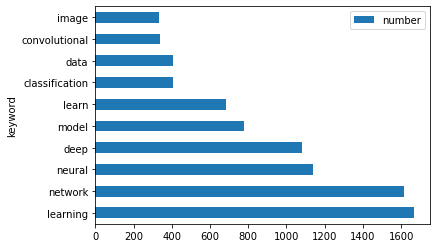

In [38]:
import matplotlib.pyplot as plt
top_n_paper_df.plot.barh(x ='keyword', y='number')
plt.show()

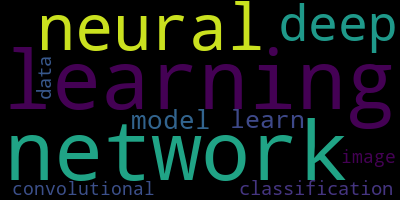

In [39]:
# Import the wordcloud library
import wordcloud

# Join the different processed titles together.
long_string = ' '.join(top_n_paper_df['keyword'])

# Create a WordCloud object, generate a wordcloud and visualise it
wordcloud = wordcloud.WordCloud()

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [17]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [18]:
sig[0]

array([0.76160526, 0.76159443, 0.76159476, ..., 0.76159432, 0.76159425,
       0.76159421])

In [19]:
# Reverse mapping of indices and paper titles
indices = pd.Series(papers_df.index, index=papers_df['title']).drop_duplicates()

In [20]:
indices

title
Dual Recurrent Attention Units for Visual Question Answering                                       0
Sequential Short-Text Classification with Recurrent and Convolutional\n  Neural Networks           1
Multiresolution Recurrent Neural Networks: An Application to Dialogue\n  Response Generation       2
Learning what to share between loosely related tasks                                               3
A Deep Reinforcement Learning Chatbot                                                              4
                                                                                                ... 
Learning the Parameters of Determinantal Point Process Kernels                                  5995
Variational Particle Approximations                                                             5996
Avoiding pathologies in very deep networks                                                      5997
Predictive Interval Models for Non-parametric Regression                             

In [21]:
indices['Semi-supervised Learning with Ladder Networks']

1003

In [22]:
list(enumerate(sig[indices['Semi-supervised Learning with Ladder Networks']]))

[(0, 0.7615944581696168),
 (1, 0.7615945209816299),
 (2, 0.7615945618887642),
 (3, 0.7615943913047153),
 (4, 0.7615943467582754),
 (5, 0.7615943190067948),
 (6, 0.7615943268163914),
 (7, 0.7615942581601224),
 (8, 0.7615942458835455),
 (9, 0.7615942653082661),
 (10, 0.761594393739326),
 (11, 0.7615945525541078),
 (12, 0.7615945092242343),
 (13, 0.761594345809341),
 (14, 0.7615943619964856),
 (15, 0.7615946963560112),
 (16, 0.76159471845506),
 (17, 0.7615943250829883),
 (18, 0.7615945357454342),
 (19, 0.7615946131931709),
 (20, 0.7615945553652982),
 (21, 0.7615943464432555),
 (22, 0.7615948717288019),
 (23, 0.7615942622704646),
 (24, 0.7615943043024529),
 (25, 0.7615945894619984),
 (26, 0.76159422520499),
 (27, 0.7615947802456966),
 (28, 0.7615951157654641),
 (29, 0.7615945368832441),
 (30, 0.7615942518536003),
 (31, 0.7615945880861414),
 (32, 0.7615942278904853),
 (33, 0.7615943018366835),
 (34, 0.7615943096012455),
 (35, 0.7615941559557649),
 (36, 0.7615948032759083),
 (37, 0.761594420

In [23]:
sorted(list(enumerate(sig[indices['Semi-supervised Learning with Ladder Networks']])), key=lambda x: x[1], reverse=True)

[(1003, 0.7616052632258596),
 (993, 0.7615995060679942),
 (883, 0.7615970215848157),
 (642, 0.7615963520234106),
 (241, 0.7615962185251581),
 (1054, 0.7615962096344847),
 (3543, 0.761596097194926),
 (1058, 0.7615960825788926),
 (3056, 0.7615960188782815),
 (967, 0.761596009381044),
 (2655, 0.7615958603667597),
 (1184, 0.7615958257149118),
 (2546, 0.7615956112019306),
 (1237, 0.7615956059100445),
 (1390, 0.7615955612010422),
 (1114, 0.7615955361510357),
 (4946, 0.761595514025815),
 (964, 0.7615955073953057),
 (953, 0.7615954771935375),
 (1365, 0.7615954659524427),
 (1359, 0.7615954569906467),
 (5009, 0.7615954530339965),
 (868, 0.7615954516864153),
 (3493, 0.7615954171586594),
 (2974, 0.7615954082343375),
 (1420, 0.7615954003481845),
 (5951, 0.7615953844014818),
 (197, 0.7615953393699085),
 (1128, 0.7615953375471602),
 (1791, 0.7615953346365065),
 (3168, 0.7615953264418638),
 (3919, 0.7615953199116284),
 (168, 0.7615953103506103),
 (3371, 0.7615952919098241),
 (419, 0.7615952839502445),

In [24]:
def give_rec(title, sig=sig):
    # Get the index corresponding to title
    idx = indices[title]

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))

    # Sort the paper 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar papers
    sig_scores = sig_scores[1:11]
    
    data = []
    count = 0
    while count<10:
        data.append([sig_scores[count][0],(papers_df['title'].iloc[sig_scores[count][0]]), sig_scores[count][1]])
        count=count+1

    df = pd.DataFrame(data, columns = ["paper_id", "title", "score"])
    return df

In [25]:
# Testing our content-based recommendation system with Genetic Algorithms and its use with back-propagation network
give_rec('Semi-supervised Learning with Ladder Networks').head(10)

,paper_id,title,score
0,993,Lateral Connections in Denoising Autoencoders ...,0.761600
1,883,Knowledge Transfer Pre-training,0.761597
2,642,Semi-Supervised Phoneme Recognition with Recur...,0.761596
3,241,Deeply-Supervised Nets,0.761596
4,1054,Adversarial Ladder Networks,0.761596
5,3543,Virtual Adversarial Ladder Networks For Semi-s...,0.761596
6,1058,Deep Learning with Sets and Point Clouds,0.761596
7,3056,Projection Based Weight Normalization for Deep...,0.761596
8,967,Semi-Supervised Learning with the Deep Renderi...,0.761596
9,2655,Semi-Supervised Generation with Cluster-aware ...,0.761596
